In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [13]:
df = pd.read_csv('hifi-non-opt.csv')
df2 = pd.read_csv('hifi-opt.csv')

In [23]:
noptmics = df['submission_duration'].values
optmics = df2['submission_duration'].values
optmics.mean(), noptmics.mean()

(137850.12021857922, 158601.1723237598)

In [24]:
optmics.std(), noptmics.std()

(122516.22364310356, 115954.99243441995)

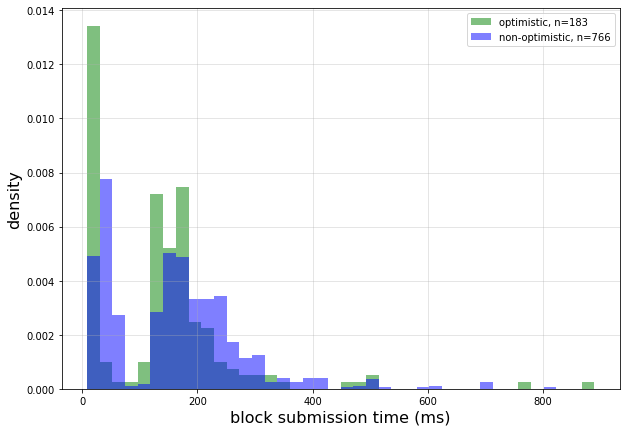

In [19]:
f, ax = plt.subplots(figsize=(10,7))

bins=np.histogram(np.hstack((optmics/1000,noptmics/1000)), bins=40)[1]

ctsopt = ax.hist(optmics/1000, bins=bins, label='optimistic, n={}'.format(len(optmics)), color='g', alpha=0.5, density=True)
ctsnopt = ax.hist(noptmics/1000, bins=bins, label='non-optimistic, n={}'.format(len(noptmics)), color='b', alpha=0.5, density=True)

# ax.set_xlim(int(1e2), int(8e2))
ax.grid(alpha=0.4)
ax.legend()

ax.set_xlabel('block submission time (ms)', size=16)
ax.set_ylabel('density', size=16)
plt.show()

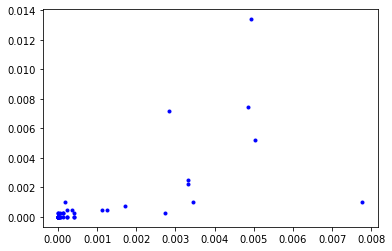

In [22]:
plt.plot(ctsnopt[0],ctsopt[0], 'b.')

In [16]:
bins

array([  8.685   ,  30.697775,  52.71055 ,  74.723325,  96.7361  ,
       118.748875, 140.76165 , 162.774425, 184.7872  , 206.799975,
       228.81275 , 250.825525, 272.8383  , 294.851075, 316.86385 ,
       338.876625, 360.8894  , 382.902175, 404.91495 , 426.927725,
       448.9405  , 470.953275, 492.96605 , 514.978825, 536.9916  ,
       559.004375, 581.01715 , 603.029925, 625.0427  , 647.055475,
       669.06825 , 691.081025, 713.0938  , 735.106575, 757.11935 ,
       779.132125, 801.1449  , 823.157675, 845.17045 , 867.183225,
       889.196   ])

In [25]:
df = pd.read_csv('nopt-granular.csv')
df2 = pd.read_csv('opt-granular.csv')
df.head()

,precheck_duration,simulation_duration,redis_update_duration,submission_duration,optimistic_submission
0,4927,18252,5862,29043,f
1,12329,12448,6345,31124,f
2,3615,11390,5797,20803,f
3,4191,10949,4233,19374,f
4,75291,12419,6911,94622,f


In [26]:
len(df2)

443

In [78]:
noptmics = df['submission_duration'].values
optmics = df2['submission_duration'].values
optmics.mean(), noptmics.mean()

(155242.5588235294, 210165.17885010267)

In [29]:
for i in [50, 75, 90, 99]:
    print(int(np.percentile(df2['redis_update_duration'], i)), end=' & ')

8893 & 12245 & 24789 & 316547 & 

In [54]:
df2['simulation_duration'].values

array([36, 14, 47, 31,  9, 28, 21, 22, 30, 26, 75, 25, 20, 20, 18, 24, 19,
       21, 12, 14, 20, 34, 16, 15, 25, 12, 51, 14, 18, 12, 12, 19, 22, 22,
       29, 30, 19, 34, 10, 12, 14, 15, 18, 11, 11, 23, 19, 22, 18, 70, 17,
       27, 36, 29, 15, 11, 17,  8, 10, 17, 22, 25, 19, 20, 12, 15, 10, 45,
       27, 30, 19, 21, 14, 18,  7, 15, 15, 32, 21, 19, 18, 15, 34, 23, 29,
       57, 28, 17, 12, 29,  9, 12, 18, 11, 15, 22, 12, 23, 32, 27, 15, 24])

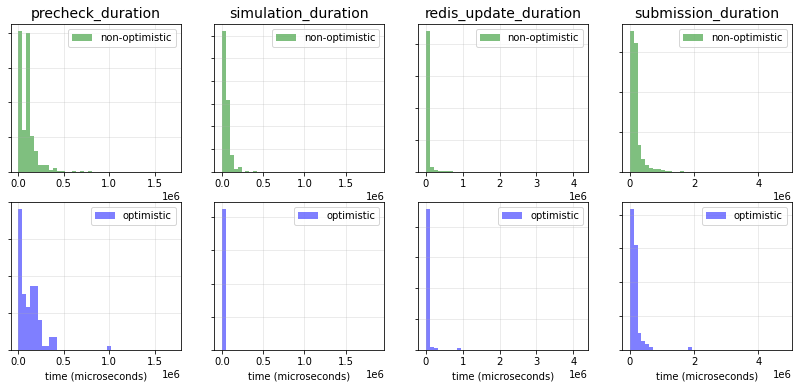

In [59]:
f, axarr = plt.subplots(nrows=2, ncols=4, figsize=(14,6))

cols = ['precheck_duration', 'simulation_duration', 'redis_update_duration', 'submission_duration']
for i in range(4):    
    noptmics = df[cols[i]].values
    optmics = df2[cols[i]].values
    
    bins=np.histogram(np.hstack((optmics,noptmics)), bins=40)[1]
    
    ctsopt = axarr[0,i].hist(noptmics, bins=bins, label='non-optimistic', color='g', alpha=0.5, density=True)
    axarr[0,i].legend()
    axarr[0,i].grid(alpha=0.3)
    axarr[0,i].set_yticklabels([])
    axarr[0,i].set_title(cols[i], size=14)

    optmics = df2[cols[i]].values
    ctsopt = axarr[1,i].hist(optmics, bins=bins, label='optimistic', color='b', alpha=0.5, density=True)
    axarr[1,i].set_xlabel("time (microseconds)")
    axarr[1,i].legend()
    axarr[1,i].grid(alpha=0.3)
    axarr[1,i].set_yticklabels([])

plt.show()

In [81]:
noptmics = df['simulation_duration'].values
optmics = df2['simulation_duration'].values
noptmics.mean(), optmics.mean(), noptmics.std(), optmics.std(),

(57164.16981519507, 21.901960784313726, 91940.87829039682, 11.586426984751249)

In [65]:
ax.

<AxesSubplot:label='8e387557-5638-4ae7-aaca-639832afe6c3'>

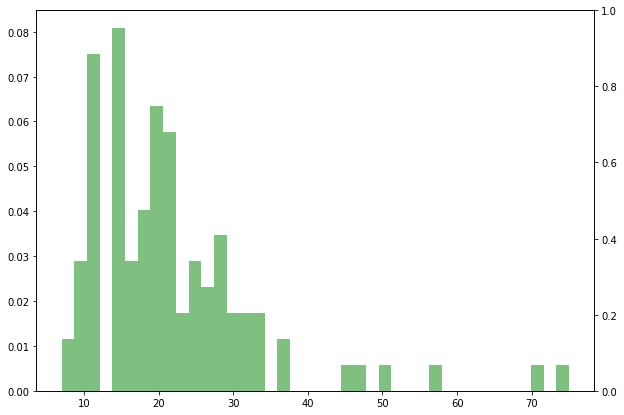

In [77]:
f, ax = plt.subplots(figsize=(10,7))
ax2 = plt.twinx()


noptmics = df['simulation_duration'].values
optmics = df2['simulation_duration'].values
bins1=np.histogram(noptmics, bins=40)[1]
bins2=np.histogram(optmics, bins=40)[1]

# ax.plot(bins1)

ctsopt = ax.hist(optmics, bins=40, label='optimistic, n={}'.format(len(optmics)), color='g', alpha=0.5, density=True)
# ctsnopt = ax2.hist(noptmics, bins=40, label='non-optimistic, n={}'.format(len(noptmics)), color='b', alpha=0.5)


plt.show()

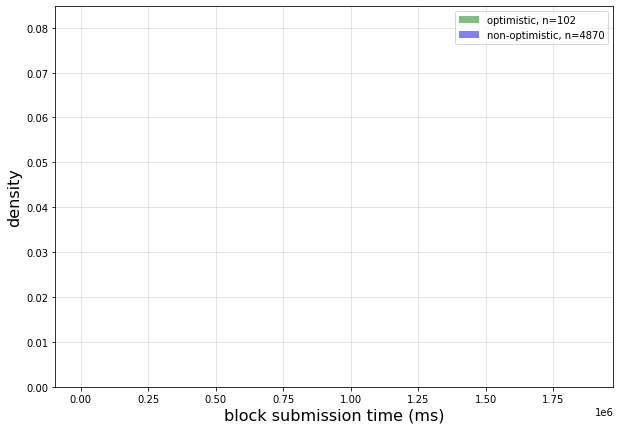

In [62]:
f, ax = plt.subplots(figsize=(10,7))

noptmics = df['simulation_duration'].values
optmics = df2['simulation_duration'].values
bins=np.histogram(np.hstack((optmics,noptmics)), bins=40)[1]

ctsopt = ax.hist(optmics, bins=40, label='optimistic, n={}'.format(len(optmics)), color='g', alpha=0.5, density=True)
ctsnopt = ax.hist(noptmics, bins=40, label='non-optimistic, n={}'.format(len(noptmics)), color='b', alpha=0.5, density=True)

# ax.set_xlim(int(1e2), int(8e2))
ax.grid(alpha=0.4)
ax.legend()

ax.set_xlabel('block submission time (ms)', size=16)
ax.set_ylabel('density', size=16)
plt.show()